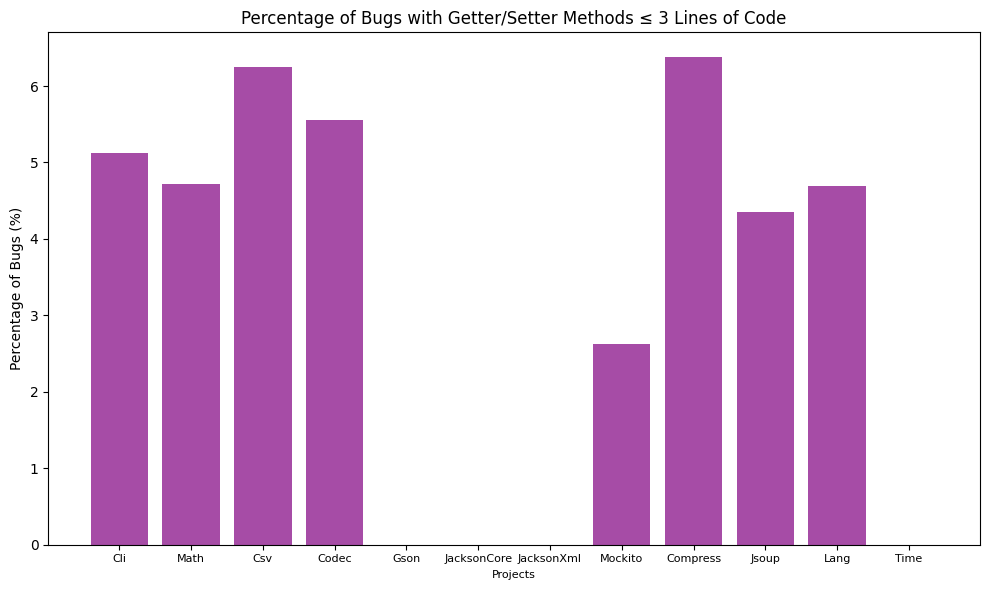

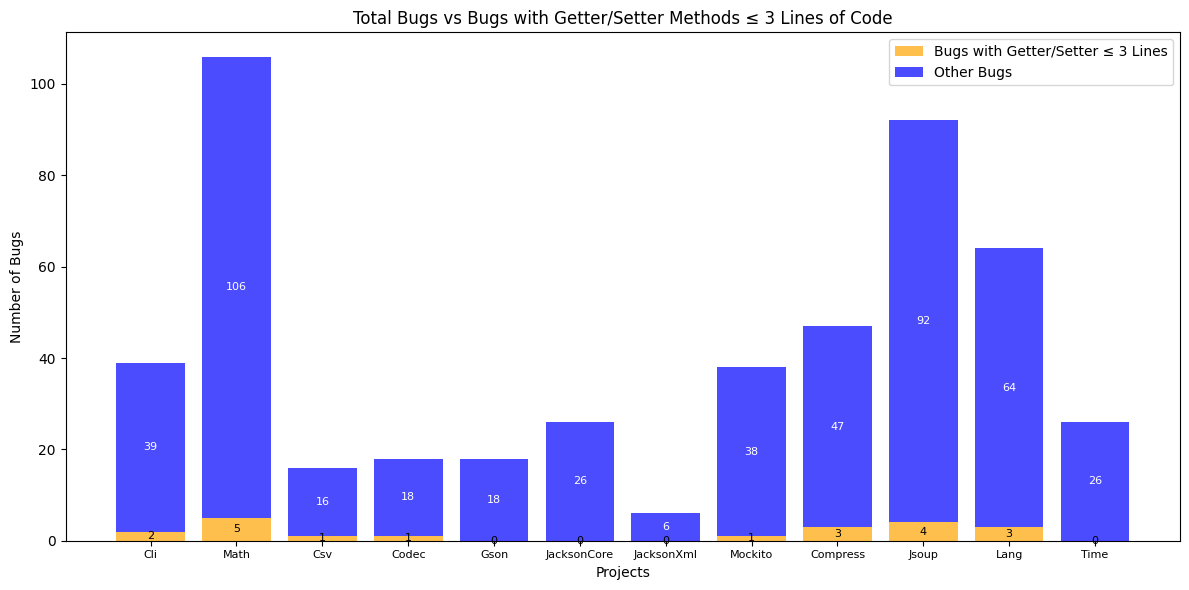

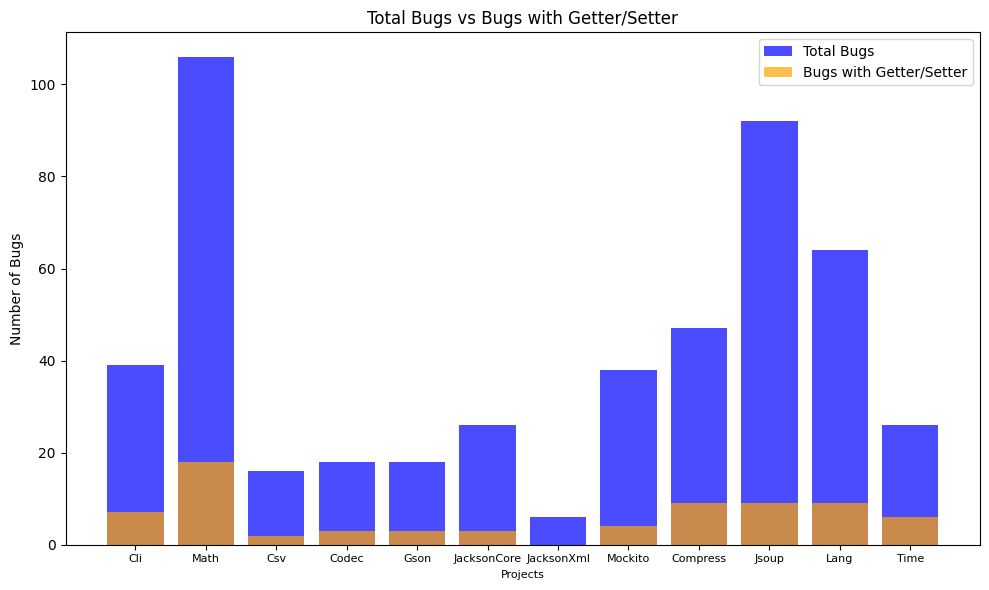

In [33]:
import json
import matplotlib.pyplot as plt

def calculate_metrics(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)

    metrics = {}

    for project_name, bugs in data.items():
        total_bugs = len(bugs)
        bugs_with_getter_setter = sum(1 for bug_id, methods in bugs.items() if any(method['type'] in ['getter', 'setter'] for method in methods))
        
        percentage_with_getter_setter = (bugs_with_getter_setter / total_bugs) * 100 if total_bugs > 0 else 0

        metrics[project_name] = {
            "total_bugs": total_bugs,
            "bugs_with_getter_setter": bugs_with_getter_setter,
            "percentage_with_getter_setter": percentage_with_getter_setter
        }

    return metrics

def generate_figure_for_methods_less_than_3_lines(json_file):
    # Load the JSON data
    with open(json_file, 'r') as file:
        data = json.load(file)

    project_names = []
    percentage_less_than_3_lines = []

    # Iterate through the projects and calculate the percentage of bugs with <= 3 lines of code
    for project_name, bugs in data.items():
        total_bugs = len(bugs)
        bugs_with_getter_setter_less_than_3 = 0

        for bug_id, methods in bugs.items():
            # Check if the bug has getter/setter methods with <= 3 lines of code
            if any(method['type'] in ['getter', 'setter'] and method.get("lines_of_code", 0) <= 3 for method in methods):
                bugs_with_getter_setter_less_than_3 += 1

        # Calculate percentage of all bugs
        if total_bugs > 0:
            percentage = (bugs_with_getter_setter_less_than_3 / total_bugs) * 100
        else:
            percentage = 0

        project_names.append(project_name)
        percentage_less_than_3_lines.append(percentage)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(project_names, percentage_less_than_3_lines, color='purple', alpha=0.7)
    plt.title("Percentage of Bugs with Getter/Setter Methods ≤ 3 Lines of Code")
    plt.xlabel("Projects", fontsize=8)
    plt.ylabel("Percentage of Bugs (%)")
    plt.xticks(fontsize=8)
    
    plt.tight_layout()
    plt.show()

def generate_figure_for_methods_less_than_3_lines_count(json_file):
    # Load the JSON data
    with open(json_file, 'r') as file:
        data = json.load(file)

    project_names = []
    bugs_with_getter_setter_less_than_3 = []

    # Iterate through the projects and calculate the number of bugs with <= 3 lines of code
    for project_name, bugs in data.items():
        count_bugs_with_getter_setter_less_than_3 = 0

        for bug_id, methods in bugs.items():
            # Check if the bug has getter/setter methods with <= 3 lines of code
            if any(method['type'] in ['getter', 'setter'] and method.get("lines_of_code", 0) <= 3 for method in methods):
                count_bugs_with_getter_setter_less_than_3 += 1

        project_names.append(project_name)
        bugs_with_getter_setter_less_than_3.append(count_bugs_with_getter_setter_less_than_3)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(project_names, bugs_with_getter_setter_less_than_3, color='blue', alpha=0.7)
    plt.title("Number of Bugs with Getter/Setter Methods ≤ 3 Lines of Code")
    plt.xlabel("Projects", fontsize=8)
    plt.ylabel("Number of Bugs")
    plt.xticks(fontsize=8)
    
    plt.tight_layout()
    plt.show()

def generate_single_bar_figure_with_less_than_3_lines(json_file):
    # Load the JSON data
    with open(json_file, 'r') as file:
        data = json.load(file)

    project_names = []
    total_bugs = []
    bugs_with_getter_setter_less_than_3 = []

    # Iterate through the projects and calculate the number of bugs with <= 3 lines of code
    for project_name, bugs in data.items():
        count_bugs_with_getter_setter_less_than_3 = 0
        total_bugs_count = len(bugs)

        for bug_id, methods in bugs.items():
            # Check if the bug has getter/setter methods with <= 3 lines of code
            if any(method['type'] in ['getter', 'setter'] and method.get("lines_of_code", 0) <= 3 for method in methods):
                count_bugs_with_getter_setter_less_than_3 += 1

        project_names.append(project_name)
        total_bugs.append(total_bugs_count)
        bugs_with_getter_setter_less_than_3.append(count_bugs_with_getter_setter_less_than_3)

    # Create a bar plot
    plt.figure(figsize=(12, 6))

    # Plot stacked bars: Total Bugs with the bottom part as Bugs with Getter/Setter ≤ 3 Lines
    plt.bar(project_names, bugs_with_getter_setter_less_than_3, label="Bugs with Getter/Setter ≤ 3 Lines", color='orange', alpha=0.7)
    plt.bar(project_names, [total - less_than_3 for total, less_than_3 in zip(total_bugs, bugs_with_getter_setter_less_than_3)], 
            bottom=bugs_with_getter_setter_less_than_3, label="Other Bugs", color='b', alpha=0.7)

    plt.title("Total Bugs vs Bugs with Getter/Setter Methods ≤ 3 Lines of Code")
    plt.xlabel("Projects", fontsize=10)
    plt.ylabel("Number of Bugs")
    plt.xticks(fontsize=8)
    plt.legend()

    # Add text annotations inside the bars
    for i, proj in enumerate(project_names):
        # Add text for bugs with getter/setter methods ≤ 3 lines
        plt.text(i, bugs_with_getter_setter_less_than_3[i] / 2, str(bugs_with_getter_setter_less_than_3[i]), ha='center', va='center', fontsize=8, color='black')
        # Add text for total bugs (other bugs + getter/setter ≤ 3 lines)
        plt.text(i, (total_bugs[i] + bugs_with_getter_setter_less_than_3[i]) / 2, str(total_bugs[i]), ha='center', va='center', fontsize=8, color='white')

    plt.tight_layout()
    plt.show()


def generate_single_figure(metrics):
    # Extract project names and metrics for plotting
    projects = list(metrics.keys())
    total_bugs = [metrics[proj]["total_bugs"] for proj in projects]
    bugs_with_getter_setter = [metrics[proj]["bugs_with_getter_setter"] for proj in projects]

    # Create a figure for Total Bugs vs Bugs with Getter/Setter
    plt.figure(figsize=(10, 6))
    plt.bar(projects, total_bugs, label="Total Bugs", alpha=0.7, color='b')
    # make the project names smaller
    plt.xticks(fontsize=8)
    plt.bar(projects, bugs_with_getter_setter, label="Bugs with Getter/Setter", alpha=0.7, color='orange')
    
    plt.title("Total Bugs vs Bugs with Getter/Setter")
    plt.xlabel("Projects", fontsize=8)
    plt.ylabel("Number of Bugs")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Example usage
metrics = calculate_metrics('../data/Analysis/getter_setter_results.json')
generate_figure_for_methods_less_than_3_lines('../data/Analysis/getter_setter_results.json')
# generate_figure_for_methods_less_than_3_lines_count('../data/Analysis/getter_setter_results.json')
generate_single_bar_figure_with_less_than_3_lines('../data/Analysis/getter_setter_results.json')

# Generate the figure using the calculated metrics from the JSON file
generate_single_figure(metrics)



In [43]:
import json

# read a json file
with open('../data/Analysis/combined_missed_bugs.json', 'r') as file:
    data = json.load(file)

for project in data:
    print('-'*20,project,'-'*20)
    for bug in data[project]:
        print(bug, end=' ')
        for method in data[project][bug]:
            print(method, end=' ')
        print()

-------------------- Cli --------------------
ochiai 20 18 27 9 11 16 17 1 10 19 26 8 21 24 23 4 15 3 12 2 13 14 25 
depgraph 20 18 16 1 10 19 21 24 23 15 3 2 13 14 22 25 
execution 20 18 27 9 11 16 17 1 10 19 26 8 21 24 23 4 15 3 12 2 13 14 22 25 
perfect 18 10 26 8 3 2 14 
random 20 18 27 9 11 16 17 1 10 19 26 8 24 23 4 15 3 12 2 13 14 22 25 
wo_gettersetter_execution 20 18 27 9 11 16 17 1 10 19 26 8 21 24 23 4 15 3 12 2 13 14 22 25 
wo_gettersetter_ochiai 20 18 9 11 16 17 1 10 19 26 8 21 24 23 4 15 3 12 2 13 14 25 
wo_gettersetter_depgraph 20 18 9 16 17 1 10 19 26 21 23 15 3 2 13 14 22 25 
wo_gettersetter_random 20 18 27 9 11 16 17 1 10 19 26 8 24 23 15 3 12 2 13 14 22 25 
wo_gettersetter_perfect 20 11 16 17 1 10 26 8 21 24 4 15 3 12 2 13 14 25 
-------------------- Math --------------------
ochiai 92 50 68 103 57 32 102 56 105 51 58 60 33 20 18 7 42 87 80 74 28 1 10 19 26 8 81 86 72 44 43 88 38 65 96 100 54 30 39 106 52 101 97 63 64 46 79 41 83 48 70 24 23 15 85 71 76 82 49 40 78 2

[57.42, 26.15, 21.22, 20.62, 19.36]
[71.06, 38.59, 33.07, 32.67, 26.28]
[77.84, 42.91, 39.85, 42.18, 30.54]
[86.03, 50.23, 50.17, 51.83, 35.2]


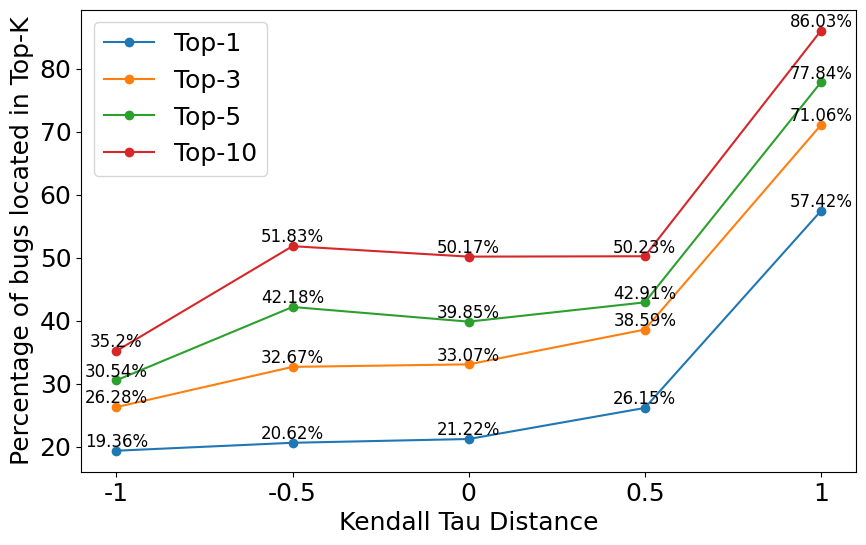

In [ ]:
import matplotlib.pyplot as plt

# Function to annotate percentages on the plot
def annotate_points(x_values, y_values):
    for x, y in zip(x_values, y_values):
        plt.text(x, y, f"{y}", fontsize=12, ha='center', va='bottom')

# Font size parameter
font_size = 18 

plt.rcParams.update({
    "font.size": font_size,
    "axes.titlesize": font_size + 2,
    "axes.labelsize": font_size,
    "xtick.labelsize": font_size,
    "ytick.labelsize": font_size,
    "legend.fontsize": font_size,
})

# Data
techniques = ["one", "half", "zero", "minus_half", "minus_one"]

# # With test exec
# top_1_values = [288, 131, 108, 104, 95]
# top_3_values = [358, 194, 167, 164, 132]
# top_5_values = [390, 216, 200, 211, 153]
# top_10_values = [430, 252, 253, 260, 175]
# prev
top_1_values = [287.67, 131.00, 106.33, 103.33, 97.00]
top_3_values = [356.00, 193.33, 165.67, 163.67, 131.67]
top_5_values = [390.00, 215.00, 199.67, 211.33, 153.00]
top_10_values = [431.00, 251.67, 251.33, 259.67, 176.33]

# top_1_values = [314.67, 149.33, 126.67, 122.33, 113.33]
# top_3_values = [393.67, 226.00, 198.00, 191.67, 162.00]
# top_5_values = [440.00, 258.33, 234.33, 241.33, 184.67]
# top_10_values = [484.67, 296.67, 292.67, 301.67, 215.33]


# # W/O test execution
# top_1_values = [292, 131, 113, 113, 84]
# top_3_values = [370, 193, 169, 164, 123]
# top_5_values = [393, 229, 203, 205, 142]
# top_10_values = [428, 264, 251, 247, 174]

# Total number of bugs
total_bugs = 501

# Calculate percentages based on the total number of bugs
top_1_percentages = [(value / total_bugs) * 100 for value in top_1_values]
top_3_percentages = [(value / total_bugs) * 100 for value in top_3_values]
top_5_percentages = [(value / total_bugs) * 100 for value in top_5_values]
top_10_percentages = [(value / total_bugs) * 100 for value in top_10_values]

# make the percentages two decimal places
top_1_percentages = [round(value, 2) for value in top_1_percentages]
top_3_percentages = [round(value, 2) for value in top_3_percentages]
top_5_percentages = [round(value, 2) for value in top_5_percentages]
top_10_percentages = [round(value, 2) for value in top_10_percentages]
print(top_1_percentages)
print(top_3_percentages)
print(top_5_percentages)
print(top_10_percentages)

# Mapping for x-axis labels to numeric values for plotting
x_labels = {"one": 1.0, "half": 0.5, "zero": 0.0, "minus_half": -0.5, "minus_one": -1.0}
x_values = [x_labels[label] for label in techniques]

# Plotting each line
plt.figure(figsize=(10, 6))

# # Plotting percentage lines for each Top-X level
# plt.plot(x_values, top_1_percentages, marker='o', label="Top-1")
# plt.plot(x_values, top_3_percentages, marker='o', label="Top-3")
# plt.plot(x_values, top_5_percentages, marker='o', label="Top-5")
# plt.plot(x_values, top_10_percentages, marker='o', label="Top-10")

# # Labels and title
# plt.xlabel("Kendall Tau Distance")
# plt.ylabel("Percentage of bugs located in Top-K")
# # plt.title("Percentage of Total Bugs Found by Technique for Top-K (With Test Execution)")
# plt.xticks(x_values, labels=["1", "0.5", "0", "-0.5", "-1"])
# plt.legend()

# # Show the plot

# plt.savefig("../Paper/Figures/rq_1_w_textexc_new", dpi=300, bbox_inches='tight')
# plt.show()
# Plotting percentage lines for each Top-K level
plt.plot(x_values, top_1_percentages, marker='o', label="Top-1")
annotate_points(x_values, top_1_percentages)

plt.plot(x_values, top_3_percentages, marker='o', label="Top-3")
annotate_points(x_values, top_3_percentages)

plt.plot(x_values, top_5_percentages, marker='o', label="Top-5")
annotate_points(x_values, top_5_percentages)

plt.plot(x_values, top_10_percentages, marker='o', label="Top-10")
annotate_points(x_values, top_10_percentages)

# Labels and title
plt.xlabel("Kendall Tau Distance")
plt.ylabel("Percentage of bugs located in Top-K")
plt.xticks(x_values, labels=["1", "0.5", "0", "-0.5", "-1"])
plt.legend()

# Save and show the plot
plt.savefig("../Paper/Figures/rq_1_w_textexc_new", dpi=300, bbox_inches='tight')
plt.show()




In [7]:
import pandas as pd
import numpy as np

# Techniques and run data
techniques = ["one", "half", "zero", "minus_half", "minus_one"]

# First run
top_1_values_run1 = [288, 131, 108, 104, 95]
top_3_values_run1 = [358, 194, 167, 164, 132]
top_5_values_run1 = [390, 216, 200, 211, 153]
top_10_values_run1 = [430, 252, 253, 260, 175]

# Second run
top_1_values_run2 = [286, 130, 103, 101, 97]
top_3_values_run2 = [352, 192, 162, 163, 132]
top_5_values_run2 = [389, 213, 199, 211, 154]
top_10_values_run2 = [431, 252, 251, 262, 177]

# Third run
top_1_values_run3 = [289, 132, 108, 105, 99]
top_3_values_run3 = [358, 194, 168, 164, 131]
top_5_values_run3 = [391, 216, 200, 212, 152]
top_10_values_run3 = [432, 251, 250, 257, 177]


# top_1_values_run1 = [314, 148, 128, 122, 113]
# top_3_values_run1 = [395, 226, 198, 191, 162]
# top_5_values_run1 = [439, 258, 235, 241, 184]
# top_10_values_run1 = [485, 297, 293, 302, 216]

# top_1_values_run2 = [315, 150, 126, 123, 114]
# top_3_values_run2 = [393, 227, 199, 192, 164]
# top_5_values_run2 = [440, 259, 233, 242, 186]
# top_10_values_run2 = [484, 296, 292, 301, 214]

# top_1_values_run3 = [315.00, 150.00, 126.00, 122.00, 113.00]
# top_3_values_run3 = [393.00, 225.00, 197.00, 192.00, 160.00]
# top_5_values_run3 = [441.00, 258.00, 235.00, 241.00, 184.00]
# top_10_values_run3 = [485.00, 297.00, 293.00, 302.0, 216.00]

# Combine all runs for analysis
all_runs_top_1 = [top_1_values_run1, top_1_values_run2, top_1_values_run3]
all_runs_top_3 = [top_3_values_run1, top_3_values_run2, top_3_values_run3]
all_runs_top_5 = [top_5_values_run1, top_5_values_run2, top_5_values_run3]
all_runs_top_10 = [top_10_values_run1, top_10_values_run2, top_10_values_run3]

# Calculate averages and standard deviations
average_top_1 = np.mean(all_runs_top_1, axis=0)
average_top_3 = np.mean(all_runs_top_3, axis=0)
average_top_5 = np.mean(all_runs_top_5, axis=0)
average_top_10 = np.mean(all_runs_top_10, axis=0)

std_top_1 = np.std(all_runs_top_1, axis=0)
std_top_3 = np.std(all_runs_top_3, axis=0)
std_top_5 = np.std(all_runs_top_5, axis=0)
std_top_10 = np.std(all_runs_top_10, axis=0)

# Create a DataFrame for results
# results_df = pd.DataFrame({
#     "Technique": techniques,
#     "Avg Top-1": average_top_1,
#     "Avg Top-3": average_top_3,
#     "Avg Top-5": average_top_5,
#     "Avg Top-10": average_top_10,
#     "Std Top-1": std_top_1,
#     "Std Top-3": std_top_3,
#     "Std Top-5": std_top_5,
#     "Std Top-10": std_top_10
# })

# \begin{table}[h!]
# \centering
# \setlength{\tabcolsep}{3pt} % Reduce horizontal padding
# \renewcommand{\arraystretch}{1.2} % Adjust vertical spacing
# \scriptsize % Reduce font size
# \caption{\peter{table caption is at the bottom for ACL}Mean and Standard Deviations for Top-K Performance Across Techniques}
# \label{tab:mean_std_topk}
# \begin{tabular}{lcccc}
# \hline
# \textbf{Kendall Tau } & \textbf{Top-1} & \textbf{Top-3} & \textbf{Top-5} & \textbf{Top-10}\\ \textbf{distance}\\
# \hline
# 1         & 287.67 ± 1.25 & 356.00 ± 2.83 & 390.00 ± 0.82 & 431.00 ± 0.82 \\
# 0.5        & 131.00 ± 0.82 & 193.33 ± 0.94 & 215.00 ± 1.41 & 251.67 ± 0.47 \\
# 0        & 106.33 ± 2.36 & 165.67 ± 2.62 & 199.67 ± 0.47 & 251.33 ± 1.25 \\
# -0.5 & 103.33 ± 1.70 & 163.67 ± 0.47 & 211.33 ± 0.47 & 259.67 ± 2.05 \\
# -1  &  97.00 ± 1.63 & 131.67 ± 0.47 & 153.00 ± 0.82 & 176.33 ± 0.94 \\
# \hline
# \end{tabular}
# \end{table}


# \begin{table}[h!]
#     \caption{A comparison of fault localization performance across techniques and splits. The table highlights differences in Top-1, Top-3, Top-5, and Top-10 ranks for the techniques Perfect and Worst across various splits.}
#     \nakhla{Should we put percentage instead of numbers?}
#     \vspace{-0.3cm}
#     \centering
#     \label{tab:split_comparison}
#     \resizebox{\columnwidth}{!}{
#     \begin{tabular}{l|c|c|c|c|c}
#     \toprule
#         \textbf{Ranking} & \textbf{Split} & \textbf{Top-1} & \textbf{Top-3} & \textbf{Top-5} & \textbf{Top-10} \\ 
#     \midrule
#         Perfect & 10 & 217 & 295 & 313 & 338 \\ 
#         Worst   & 10 & 211 & 298 & 330 & 362 \\ 
#         \midrule
#         Perfect & 20 & 247 & 311 & 343 & 374 \\ 
#         Worst   & 20 & 186 & 265 & 288 & 335 \\ 
#         \midrule
#         Perfect & 30 & 261 & 326 & 347 & 382 \\ 
#         Worst   & 30 & 175 & 236 & 266 & 309 \\ 
#         \midrule
#         Perfect & 40 & 270 & 328 & 347 & 390 \\ 
#         Worst   & 40 & 171 & 223 & 249 & 284 \\ 
#         \midrule
#         Perfect & 50 & 278 & 338 & 368 & 408 \\ 
#         Worst   & 50 & 170 & 224 & 248 & 292 \\ 
#     \bottomrule
#     \end{tabular}
#     }
#     \vspace{-0.4cm}
# \end{table}



# Format results as mean ± std
results_df = pd.DataFrame({
    "Technique": techniques,
    "Top-1": [f"{mean:.2f} ± {std:.2f}" for mean, std in zip(average_top_1, std_top_1)],
    "Top-3": [f"{mean:.2f} ± {std:.2f}" for mean, std in zip(average_top_3, std_top_3)],
    "Top-5": [f"{mean:.2f} ± {std:.2f}" for mean, std in zip(average_top_5, std_top_5)],
    "Top-10": [f"{mean:.2f} ± {std:.2f}" for mean, std in zip(average_top_10, std_top_10)]
})

# Display the updated DataFrame
print(results_df)


    Technique          Top-1          Top-3          Top-5         Top-10
0         one  287.67 ± 1.25  356.00 ± 2.83  390.00 ± 0.82  431.00 ± 0.82
1        half  131.00 ± 0.82  193.33 ± 0.94  215.00 ± 1.41  251.67 ± 0.47
2        zero  106.33 ± 2.36  165.67 ± 2.62  199.67 ± 0.47  251.33 ± 1.25
3  minus_half  103.33 ± 1.70  163.67 ± 0.47  211.33 ± 0.47  259.67 ± 2.05
4   minus_one   97.00 ± 1.63  131.67 ± 0.47  153.00 ± 0.82  176.33 ± 0.94


In [21]:
import os
import json

split = 50
# Define the base folder
base_folder = f"../data/Output/RankedDataSplit/{split}"

# Initialize the structured data
structured_data = {}

# Traverse the directory
for project_folder in os.listdir(base_folder):
    project_path = os.path.join(base_folder, project_folder)
    if not os.path.isdir(project_path):
        continue  # Skip if it's not a folder

    if project_folder not in structured_data:
        structured_data[project_folder] = {}  # Initialize project level

    for technique_folder in os.listdir(project_path):
        technique_path = os.path.join(project_path, technique_folder)
        if not os.path.isdir(technique_path):
            continue  # Skip if it's not a folder

        if technique_folder not in structured_data[project_folder]:
            structured_data[project_folder][technique_folder] = {}  # Initialize technique level

        for bug_version in os.listdir(technique_path):
            bug_path = os.path.join(technique_path, bug_version)
            if not os.path.isdir(bug_path):
                continue  # Skip if it's not a folder

            if bug_version not in structured_data[project_folder][technique_folder]:
                structured_data[project_folder][technique_folder][bug_version] = {}  # Initialize bug level

            for json_file in os.listdir(bug_path):
                if json_file.endswith(".json"):
                    json_path = os.path.join(bug_path, json_file)

                    # Read the JSON file
                    with open(json_path, "r") as file:
                        data = json.load(file)

                    # Extract relevant data
                    project_name = data["project_name"]
                    bug_id = data["bug_id"]
                    test_id = data["test_id"]

                    if test_id not in structured_data[project_folder][technique_folder][bug_version]:
                        structured_data[project_folder][technique_folder][bug_version][test_id] = []  # Initialize test level

                    # Collect top-10 method details
                    top_methods = []
                    for entry in data["ans"][:10]:  # Top-10 ranks
                        method_id = entry["method_id"]
                        rank = entry["rank"]
                        chunk = (method_id // 10) + 1  # Determine the chunk (starting from 1)
                        top_methods.append({
                            "method_id": method_id,
                            "rank": rank,
                            "chunk": chunk
                        })

                    # Append the top methods to the test level
                    structured_data[project_folder][technique_folder][bug_version][test_id] = top_methods

# Save the structured data to a JSON file
output_file = f"../data/Analysis/BugPosition/Split{split}/top10_chunk_{split}.json"
if not os.path.exists(os.path.dirname(output_file)):
    os.makedirs(os.path.dirname(output_file))
with open(output_file, "w") as file:
    json.dump(structured_data, file, indent=4)

print(f"Structured data saved to {output_file}")


Structured data saved to ../data/Analysis/BugPosition/Split50/top10_chunk_50.json


In [33]:
import os
import json
import csv

# Define parameters
splits = [10, 20, 50]  # List of splits to process
top_k = 5  # Number of top ranks to include in the analysis
selected_techniques = ["random", "perfect_callgraph"]  # Techniques to include in processing

# Base folder for data
base_folder = "../data/Analysis/BugPosition"

# Initialize data storage for the CSV
csv_data = []
split_summary = {split: {"chunk_sums": [0] * top_k, "rank_counts": [0] * top_k, "techniques": {}} for split in splits}

# Process each split
for split in splits:
    input_file = f"{base_folder}/Split{split}/top10_chunk_{split}.json"
    
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    # Load the structured JSON file
    with open(input_file, "r") as file:
        structured_data = json.load(file)

    # Process the JSON data
    for project, techniques in structured_data.items():
        if project == 'RawOutput':
            continue

        # Iterate over techniques
        for technique, bugs in techniques.items():
            if technique not in selected_techniques:  # Skip techniques not in the selected list
                continue

            if technique not in split_summary[split]["techniques"]:
                split_summary[split]["techniques"][technique] = {"chunk_sums": [0] * top_k, "rank_counts": [0] * top_k}

            chunk_sums = [0] * top_k
            rank_counts = [0] * top_k

            # Iterate over bugs and tests
            for bug, tests in bugs.items():
                for test, methods in tests.items():
                    for i, method in enumerate(methods[:top_k]):  # Only process top-k ranks
                        chunk_sums[i] += method["chunk"]
                        rank_counts[i] += 1
                        split_summary[split]["chunk_sums"][i] += method["chunk"]
                        split_summary[split]["rank_counts"][i] += 1
                        split_summary[split]["techniques"][technique]["chunk_sums"][i] += method["chunk"]
                        split_summary[split]["techniques"][technique]["rank_counts"][i] += 1

            # Calculate average chunks for each rank position
            avg_chunks = [chunk_sums[i] / rank_counts[i] if rank_counts[i] > 0 else 0 for i in range(top_k)]

            # Append project-specific data to the CSV
            for rank, avg_chunk in enumerate(avg_chunks, start=1):
                csv_data.append({
                    "Project": project,
                    "Split": split,
                    "Technique": technique,
                    "Rank Position": rank,
                    "Average Chunk": round(avg_chunk, 2)
                })

# Add combined results for selected techniques
for split, summary in split_summary.items():
    for technique in selected_techniques:
        if technique in summary["techniques"]:
            technique_summary = summary["techniques"][technique]
            technique_avg_chunks = [
                technique_summary["chunk_sums"][i] / technique_summary["rank_counts"][i]
                if technique_summary["rank_counts"][i] > 0 else 0
                for i in range(top_k)
            ]
            for rank, avg_chunk in enumerate(technique_avg_chunks, start=1):
                csv_data.append({
                    "Project": "Combined",
                    "Split": split,
                    "Technique": technique,
                    "Rank Position": rank,
                    "Average Chunk": round(avg_chunk, 2)
                })

# Define the output CSV file
output_csv_file = "../data/Analysis/combined_project_split_stats.csv"

# Write to CSV
csv_columns = ["Project", "Split", "Technique", "Rank Position", "Average Chunk"]
os.makedirs(os.path.dirname(output_csv_file), exist_ok=True)

with open(output_csv_file, "w", newline="") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    writer.writerows(csv_data)

print(f"CSV file saved at {output_csv_file}")


CSV file saved at ../data/Analysis/combined_project_split_stats.csv


In [11]:
def generate_latex_table(data, total_bugs):
    # Header of the LaTeX table
    latex_code = r"""
\begin{table}[h!]
    \caption{Comparison of fault localization performance using different metrics based ordering with percentage of bugs found.}
    \vspace{-0.3cm}
    \centering
    \label{tab:technique_comparison}
    \resizebox{\columnwidth}{!}{
    \begin{tabular}{l|c|c|c|c}
    \toprule
        \textbf{Technique} & \textbf{Top-1} & \textbf{Top-3} & \textbf{Top-5} & \textbf{Top-10} \\ 
    \midrule
"""
    for technique, values in data.items():
        top1, top3, top5, top10 = values
        latex_code += (
            f"        {technique} & "
            f"{top1:.1f} ({(top1/total_bugs)*100:.1f}\\%) & "
            f"{top3:.1f} ({(top3/total_bugs)*100:.1f}\\%) & "
            f"{top5:.1f} ({(top5/total_bugs)*100:.1f}\\%) & "
            f"{top10:.1f} ({(top10/total_bugs)*100:.1f}\\%) \\\\\n"
            r"        \midrule"
            "\n"
        )

    # Footer of the LaTeX table
    latex_code += r"""
    \bottomrule
    \end{tabular}
    }
    \vspace{-0.4cm}
\end{table}
"""
    return latex_code


# Input data: Technique and Top-K metrics
data = {
    "DepGraph": [242.0, 338.0, 386.0, 419.0],
    "CallGraph\\textsubscript{BFS}": [175.0, 252.0, 294.0, 343.0],
    "CallGraph\\textsubscript{DFS}": [173.0, 253.0, 305.0, 351.0],
    "Ochiai": [164.0, 252.0, 293.0, 342.0],
    "LOC": [163.0, 256.0, 289.0, 351.0],
}

# Total number of bugs
total_bugs = 501

# Generate LaTeX table
latex_table = generate_latex_table(data, total_bugs)

# Output the generated LaTeX table
print(latex_table)



\begin{table}[h!]
    \caption{Comparison of fault localization performance using different metrics based ordering with percentage of bugs found.}
    \vspace{-0.3cm}
    \centering
    \label{tab:technique_comparison}
    \resizebox{\columnwidth}{!}{
    \begin{tabular}{l|c|c|c|c}
    \toprule
        \textbf{Technique} & \textbf{Top-1} & \textbf{Top-3} & \textbf{Top-5} & \textbf{Top-10} \\ 
    \midrule
        DepGraph & 242.0 (48.3\%) & 338.0 (67.5\%) & 386.0 (77.0\%) & 419.0 (83.6\%) \\
        \midrule
        CallGraph\textsubscript{BFS} & 175.0 (34.9\%) & 252.0 (50.3\%) & 294.0 (58.7\%) & 343.0 (68.5\%) \\
        \midrule
        CallGraph\textsubscript{DFS} & 173.0 (34.5\%) & 253.0 (50.5\%) & 305.0 (60.9\%) & 351.0 (70.1\%) \\
        \midrule
        Ochiai & 164.0 (32.7\%) & 252.0 (50.3\%) & 293.0 (58.5\%) & 342.0 (68.3\%) \\
        \midrule
        LOC & 163.0 (32.5\%) & 256.0 (51.1\%) & 289.0 (57.7\%) & 351.0 (70.1\%) \\
        \midrule

    \bottomrule
    \end{tabula

In [13]:
def generate_latex_table_with_percentages(data, total_bugs):
    # Header of the LaTeX table
    latex_code = r"""
\begin{table}[h!]
    \caption{A comparison of fault localization performance across techniques and splits. The table highlights differences in Top-1, Top-3, Top-5, and Top-10 ranks for the techniques Perfect and Worst across various splits.}
    \vspace{-0.3cm}
    \centering
    \label{tab:split_comparison}
    \resizebox{\columnwidth}{!}{
    \begin{tabular}{l|c|c|c|c|c}
    \toprule
        \textbf{Ranking} & \textbf{Split} & \textbf{Top-1} & \textbf{Top-3} & \textbf{Top-5} & \textbf{Top-10} \\ 
    \midrule
"""
    for split in sorted(next(iter(data.values())).keys()):  # Loop through split sizes
        for ranking in ["Perfect", "Worst"]:  # Order matters: Perfect first, then Worst
            top1, top3, top5, top10 = data[ranking][split]
            latex_code += (
                f"        {ranking} & {split} & "
                f"{top1} ({(top1/total_bugs)*100:.1f}\\%) & "
                f"{top3} ({(top3/total_bugs)*100:.1f}\\%) & "
                f"{top5} ({(top5/total_bugs)*100:.1f}\\%) & "
                f"{top10} ({(top10/total_bugs)*100:.1f}\\%) \\\\\n"
            )
        latex_code += r"        \midrule" + "\n"

    # Footer of the LaTeX table
    latex_code += r"""
    \bottomrule
    \end{tabular}
    }
    \vspace{-0.4cm}
\end{table}
"""
    return latex_code


# Input data
data = {
    "Perfect": {
        10: [217, 295, 313, 338],
        20: [247, 311, 343, 374],
        30: [261, 326, 347, 382],
        40: [270, 328, 347, 390],
        50: [278, 338, 368, 408],
    },
    "Worst": {
        10: [211, 298, 330, 362],
        20: [186, 265, 288, 335],
        30: [175, 236, 266, 309],
        40: [171, 223, 249, 284],
        50: [170, 224, 248, 292],
    },
}

# Total number of bugs
total_bugs = 501

# Generate LaTeX table
latex_table = generate_latex_table_with_percentages(data, total_bugs)

# Output the generated LaTeX table
print(latex_table)



\begin{table}[h!]
    \caption{A comparison of fault localization performance across techniques and splits. The table highlights differences in Top-1, Top-3, Top-5, and Top-10 ranks for the techniques Perfect and Worst across various splits.}
    \vspace{-0.3cm}
    \centering
    \label{tab:split_comparison}
    \resizebox{\columnwidth}{!}{
    \begin{tabular}{l|c|c|c|c|c}
    \toprule
        \textbf{Ranking} & \textbf{Split} & \textbf{Top-1} & \textbf{Top-3} & \textbf{Top-5} & \textbf{Top-10} \\ 
    \midrule
        Perfect & 10 & 217 (43.3\%) & 295 (58.9\%) & 313 (62.5\%) & 338 (67.5\%) \\
        Worst & 10 & 211 (42.1\%) & 298 (59.5\%) & 330 (65.9\%) & 362 (72.3\%) \\
        \midrule
        Perfect & 20 & 247 (49.3\%) & 311 (62.1\%) & 343 (68.5\%) & 374 (74.7\%) \\
        Worst & 20 & 186 (37.1\%) & 265 (52.9\%) & 288 (57.5\%) & 335 (66.9\%) \\
        \midrule
        Perfect & 30 & 261 (52.1\%) & 326 (65.1\%) & 347 (69.3\%) & 382 (76.2\%) \\
        Worst & 30 & 175 (34.9\